In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
nyc_evictions = pd.read_csv('data/Evictions_20241017.csv.gz', compression='gzip')
nyc_evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,54296/20,11304,279 WEST 22ND STREET,5,11/21/2023,David,Smith,Residential,MANHATTAN,10011,Not an Ejectment,Possession,40.744426,-73.998466,4.0,3.0,91.0,1014101.0,1.007720e+09,Hudson Yards-Chelsea-Flatiron-Union Square
1,74742/16,5193,134-10 101 AVE APT 1,1,06/08/2017,Robert,Renzulli,Residential,QUEENS,11419,Not an Ejectment,Possession,40.693497,-73.813489,9.0,28.0,152.0,4450612.0,4.095020e+09,Richmond Hill
2,50891/19,496507,2110 ARTHUR AVENUE,2,02/13/2020,Danny,Weinheim,Residential,BRONX,10457,Not an Ejectment,Possession,40.849868,-73.891292,6.0,15.0,373.0,2012027.0,2.030700e+09,East Tremont
3,340945/23,37543,1823 NARRAGANSETT AVENUE,NaN,07/23/2024,Edward,Guida,Residential,BRONX,10461,Not an Ejectment,Possession,40.852777,-73.848857,11.0,13.0,288.0,2046825.0,2.042030e+09,Pelham Parkway
4,59295/17,12167,62-60 60TH ROAD,NaN,09/12/2017,Edward,Guida,Residential,QUEENS,11378,Not an Ejectment,Possession,40.716371,-73.901098,5.0,30.0,601.0,4433508.0,4.027580e+09,Maspeth


In [3]:
# look at residential vs. commercial evictions
nyc_evictions['Residential/Commercial'].value_counts()

Residential/Commercial
Residential    89286
Commercial      9073
Name: count, dtype: int64

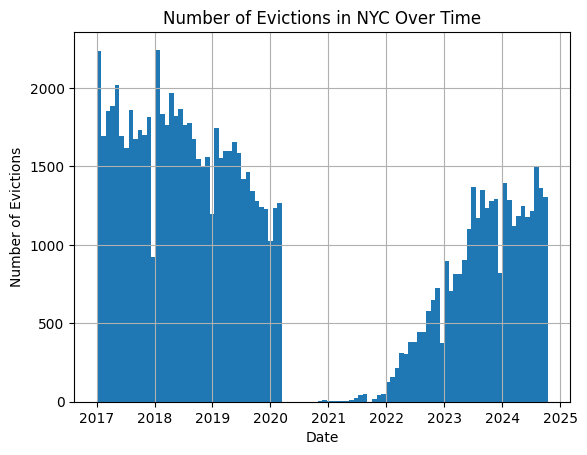

In [4]:
# time period covered
# convert to datetime
nyc_evictions['Executed Date'] = pd.to_datetime(nyc_evictions['Executed Date'])

# plot the number of evictions over time
nyc_evictions['Executed Date'].hist(bins=100)
plt.xlabel('Date')
plt.ylabel('Number of Evictions')
plt.title('Number of Evictions in NYC Over Time')
plt.show()

In [5]:
# spatial
nyc_evictions['BOROUGH'].value_counts()

BOROUGH
BRONX            31161
BROOKLYN         28284
QUEENS           19075
MANHATTAN        16214
STATEN ISLAND     3625
Name: count, dtype: int64

In [27]:
## plot count of total evictions by borough over time
nyc_evictions['YEAR'] = nyc_evictions['Executed Date'].dt.year
by_borough = nyc_evictions.groupby(['YEAR', 'BOROUGH']).size().unstack().reset_index()
print(by_borough.head())

# ## reshape to long by borough
by_borough_long = by_borough.melt(id_vars='YEAR', var_name='BOROUGH', value_name='EVICTION_COUNT')
print(by_borough_long.head())

BOROUGH  YEAR  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
0        2017   7658      6355       3450    4325            734
1        2018   7140      6157       3390    4452            691
2        2019   6244      5312       2818    3705            636
3        2020   1088      1005        521     696            112
4        2021     29       100         68      36             35
   YEAR BOROUGH  EVICTION_COUNT
0  2017   BRONX            7658
1  2018   BRONX            7140
2  2019   BRONX            6244
3  2020   BRONX            1088
4  2021   BRONX              29


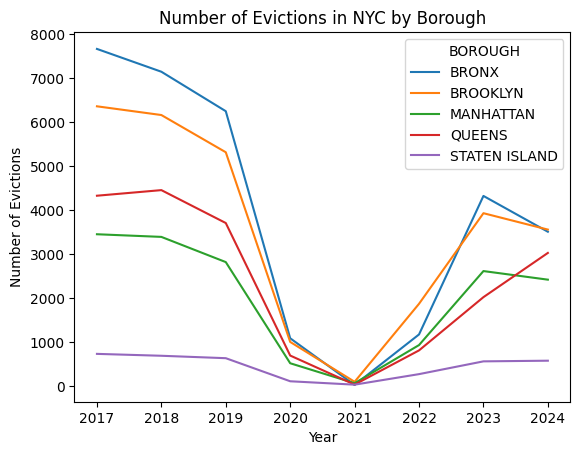

In [29]:
# plot total evictions on the y-axis and year on the x-axis
fig, ax = plt.subplots()
sns.lineplot(data=by_borough_long, x='YEAR', y='EVICTION_COUNT', hue='BOROUGH')
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
plt.title('Number of Evictions in NYC by Borough')
plt.show()


In [31]:
# write out the data
by_borough.to_csv('data/nyc_borough_evictions_aggregate.csv.gz', index=False, compression='gzip')